In [260]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import napari

In [167]:
# out_fp = '/Users/erikstorrs/Downloads/ht206b1_outputs.npy'
# data = np.load(out_fp, allow_pickle=True).flat[0]

In [237]:
# out_fp = '/Users/erikstorrs/Downloads/S18-9906_outputs.npy'
out_fp = '/Users/erikstorrs/Downloads/s18-9906_codex_outputs.npy'
data = np.load(out_fp, allow_pickle=True).flat[0]

In [238]:
data.keys()

dict_keys(['cluster_ids', 'cluster_probs', 'cluster_volume', 'section_positions'])

In [239]:
data['cluster_ids'].shape
data['cluster_volume'].shape

(11, 132, 132)

In [240]:
volume = data['cluster_volume'].copy()

In [241]:
volume = np.vstack((
    np.expand_dims(np.zeros_like(volume[0]), 0) - 1,
    volume,
    np.expand_dims(np.zeros_like(volume[0]), 0) - 1,
))

In [242]:
# cluster_to_label = {i:f'cluster {i}' for i in np.unique(volume)}
# for i in [4,8]:
#     cluster_to_label[i] = 'immune enriched'
# for i in [12]:
#     cluster_to_label[i] = 'normal epithelial'
# for i in [23,19,27,3]:
#     cluster_to_label[i] = 'fibrotic'
# for i in [20,9,28,11,25,7,16,10,17,15,24]:
#     cluster_to_label[i] = 'malignant'

In [243]:
cluster_to_label = {i:f'cluster {i}' for i in np.unique(volume)}
for i in [1]:
    cluster_to_label[i] = 'immune enriched'
for i in [6]:
    cluster_to_label[i] = 'fibrotic'
for i in [0,3]:
    cluster_to_label[i] = 'malignant'
for i in [8]:
    cluster_to_label[i] = 'normal epithelial'

In [244]:
# cluster_to_label = {i:f'cluster {i}' for i in np.unique(volume)}
# for i in [4]:
#     cluster_to_label[i] = 'epithelial'
# for i in [0, 8, 2]:
#     cluster_to_label[i] = 'immune boundary'
    

In [245]:
renamed = np.vectorize(cluster_to_label.get)(volume)

In [246]:
clusters = np.unique(renamed).tolist()

In [247]:
# cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
# cmap[clusters.index('immune enriched')] = sns.color_palette()[4]
# cmap[clusters.index('normal epithelial')] = sns.color_palette()[2]
# cmap[clusters.index('fibrotic')] = sns.color_palette()[0]
# cmap[clusters.index('malignant')] = sns.color_palette()[1]

In [248]:
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
cmap[clusters.index('immune enriched')] = sns.color_palette()[4]
cmap[clusters.index('fibrotic')] = sns.color_palette()[0]
cmap[clusters.index('malignant')] = sns.color_palette()[1]
cmap[clusters.index('normal epithelial')] = sns.color_palette()[2]

In [249]:
viewer = napari.Viewer(ndisplay=3)
for i, cluster in enumerate(clusters):
    viewer.add_labels(
        (renamed==cluster).astype(int), name=cluster, visible=False, opacity=1., color={1:cmap[i]}, num_colors=1)

In [251]:
out_fp = '/Users/erikstorrs/Downloads/s18-9906_codex_outputs.npy'
codex_data = np.load(out_fp, allow_pickle=True).flat[0]

In [252]:
out_fp = '/Users/erikstorrs/Downloads/S18-9906_outputs.npy'
xenium_data = np.load(out_fp, allow_pickle=True).flat[0]

In [257]:
volume = codex_data['cluster_volume']
codex_volume = np.vstack((
    np.zeros_like(volume[:1]) - 1,
    volume,
    np.zeros_like(volume[:1]) - 1
))

codex_volume.shape

(13, 132, 132)

In [258]:
volume = xenium_data['cluster_volume']
xenium_volume = np.vstack((
    np.zeros_like(volume[:1]) - 1,
    volume,
    np.zeros_like(volume[:1]) - 1
))
xenium_volume.shape

(13, 140, 132)

In [266]:
xenium_volume = xenium_volume[:, 4:-4]
xenium_volume.shape

(13, 132, 132)

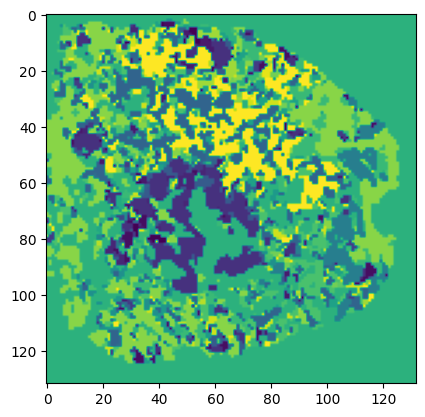

In [267]:
plt.imshow(xenium_volume[1])

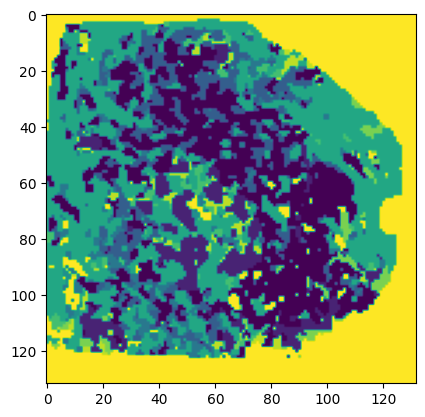

In [268]:
plt.imshow(codex_volume[1])

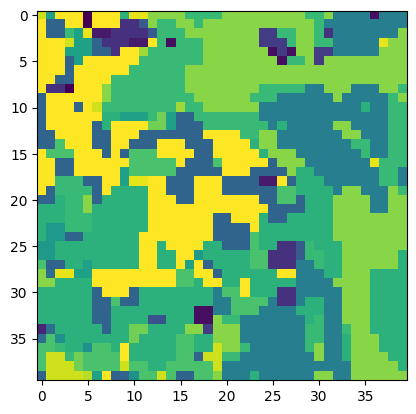

In [269]:
plt.imshow(xenium_volume[1, 40:80, 80:120])

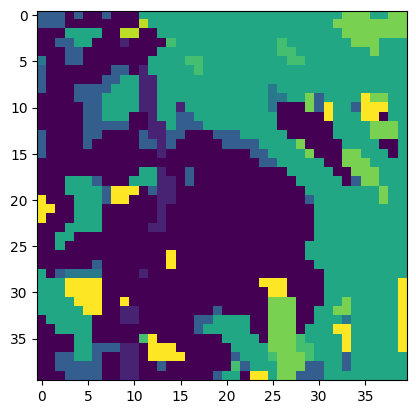

In [270]:
plt.imshow(codex_volume[1, 40:80, 80:120])

In [274]:
viewer = napari.Viewer(ndisplay=3)

clusters = np.unique(codex_volume).tolist()
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
cmap[clusters.index(1)] = sns.color_palette()[0]

for i, cluster in enumerate(clusters):
    viewer.add_labels(
        (codex_volume==cluster).astype(int), name=f'codex {cluster}', visible=False, opacity=1., color={1:cmap[i]}, num_colors=1)
    
clusters = np.unique(xenium_volume).tolist()
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
cmap[clusters.index(4)] = sns.color_palette()[1]
cmap[clusters.index(8)] = sns.color_palette()[2]

for i, cluster in enumerate(clusters):
    viewer.add_labels(
        (xenium_volume==cluster).astype(int), name=f'xenium {cluster}', visible=False, opacity=1., color={1:cmap[i]}, num_colors=1)   
    

In [281]:
codex_mask = codex_volume==1
xenium_mask = ((xenium_volume==4)|(xenium_volume==8))
overlap = codex_mask.astype(int) + xenium_mask.astype(int) == 2
overlap.shape

(13, 132, 132)

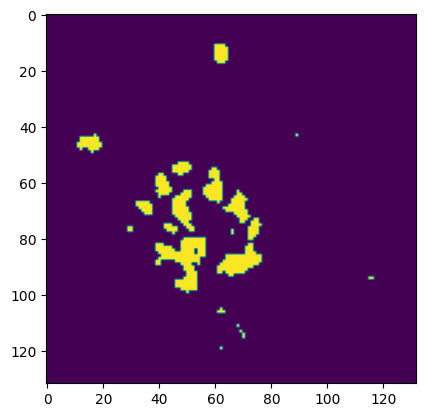

In [282]:
plt.imshow(overlap[2])

In [283]:
new = np.zeros_like(overlap, dtype=int)
new[codex_volume==1] = 1
new[xenium_volume==4] = 4
new[xenium_volume==8] = 8
new[overlap] = 99

clusters = np.unique(new).tolist()
cmap = sns.color_palette('tab20')
cmap[clusters.index(1)] = sns.color_palette()[0]
cmap[clusters.index(4)] = sns.color_palette()[2]
cmap[clusters.index(8)] = sns.color_palette()[4]
cmap[clusters.index(99)] = sns.color_palette()[1]

In [284]:
viewer = napari.Viewer(ndisplay=3)
for i, cluster in enumerate(clusters):
    viewer.add_labels(
        (new==cluster).astype(int), name=f'cluster {cluster}', visible=False, opacity=1., color={1:cmap[i]}, num_colors=1)   
    

In [250]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]